In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

data=pd.read_csv("./Data/insurance_cleaned.csv")
df=data.copy()

# Конвертиране на категорийните променливи чрез Label Encoding
label_encoders = {}
for column in ['sex', 'smoker', 'region', 'bmi']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Стандартизиране на числовите данни
scaler = StandardScaler()
df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])

# Прилагане на K-Means клъстеризация
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df.drop('charges', axis=1))

# Разглеждане на резултатите от клъстеризацията
print(df.head())


c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


        age  sex       bmi  children  smoker  region   charges  cluster
0 -1.472578    0 -1.432327 -0.900260       1       3  0.291550        3
1 -0.825961    1  0.802510  1.585814       0       2 -0.733774        2
2 -0.466729    1 -0.314909 -0.900260       0       1  0.712016        0
3 -0.538575    1 -1.432327 -0.900260       0       1 -0.781811        0
4 -0.610422    0 -1.432327 -0.900260       0       2 -0.790900        0


c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

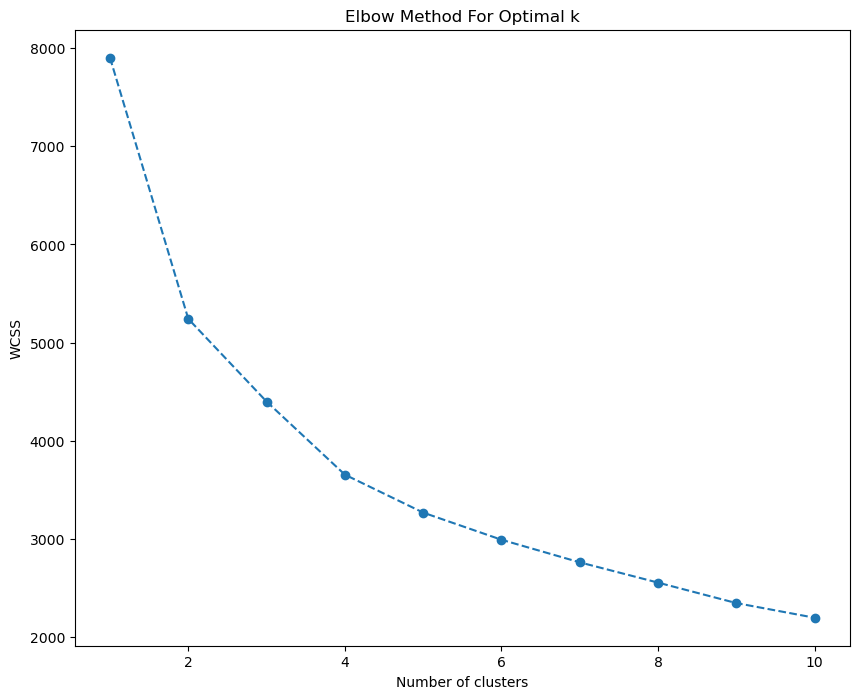

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Използване на Elbow метода за да определим най-добрия брой клъстери
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop('charges', axis=1))
    wcss.append(kmeans.inertia_)

# Визуализация на Elbow метода
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


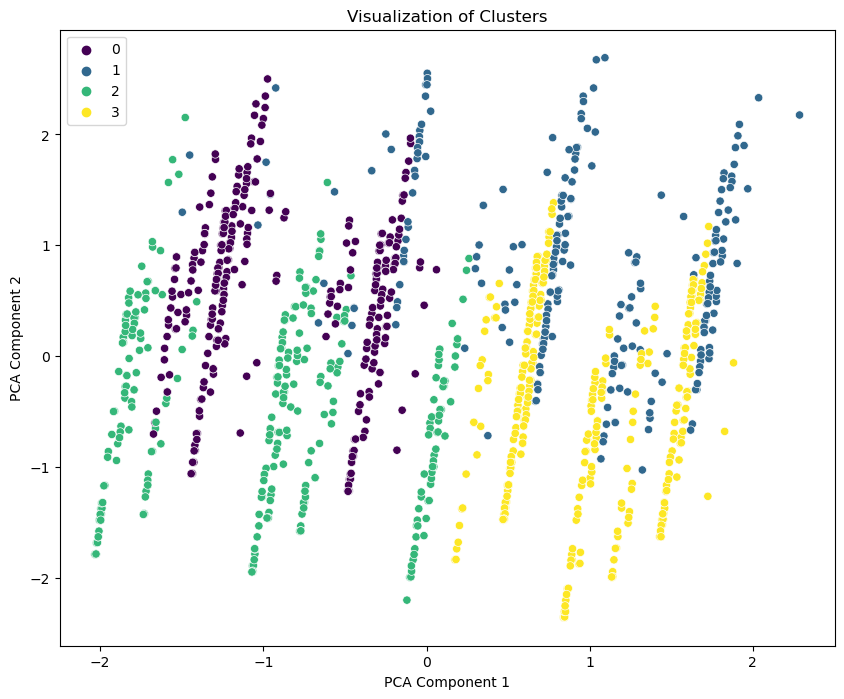

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Клъстеризация
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df.drop('charges', axis=1))

# Добавяме клъстерите към дата фрейма
df['cluster'] = clusters

# Намаляване на размерността за визуализация
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(['charges', 'cluster'], axis=1))

# Визуализация на клъстерите
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\baal_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


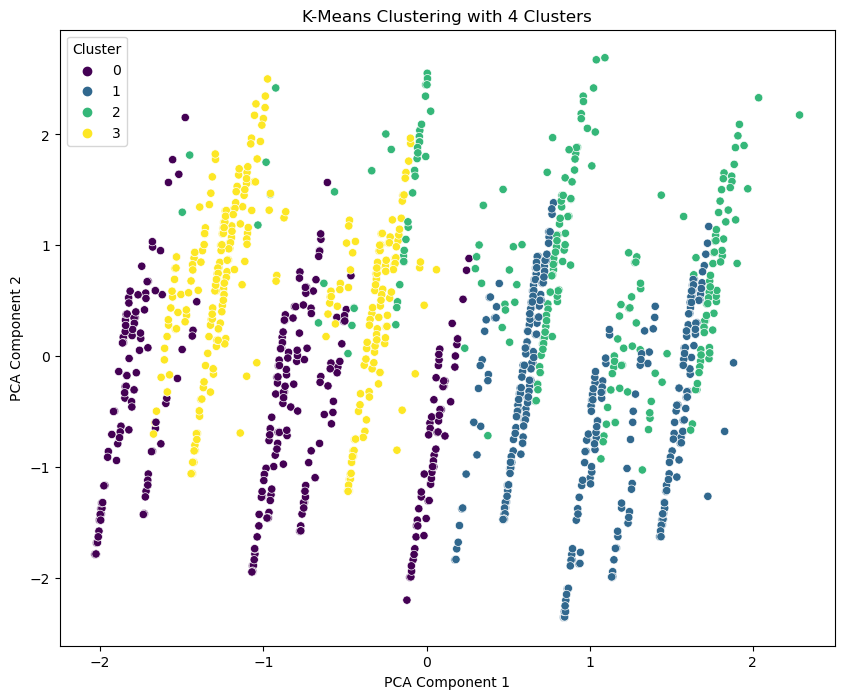

Silhouette Score: 0.194


In [4]:
# Обучаване на K-Means модела с най-добрия брой клъстери
# kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df.drop('charges', axis=1))

# Визуализиране на клъстерите след PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(['charges', 'cluster'], axis=1))

# Визуализация на клъстерите с PCA компоненти
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Проверка на стабилността на клъстерите
# Силуетен скор може да се използва за оценка на разстоянието между резултатните клъстери
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df.drop(['charges', 'cluster'], axis=1), df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')


In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Разделяне на данните на обучаващи и тестови набори
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучете XGBoost регресора
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train, y_train)

# Предсказания на тестовия набор
y_pred = xg_reg.predict(X_test)

# Оценка на модела
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


RMSE: 0.40610793619894786
R^2: 0.8263744302803424


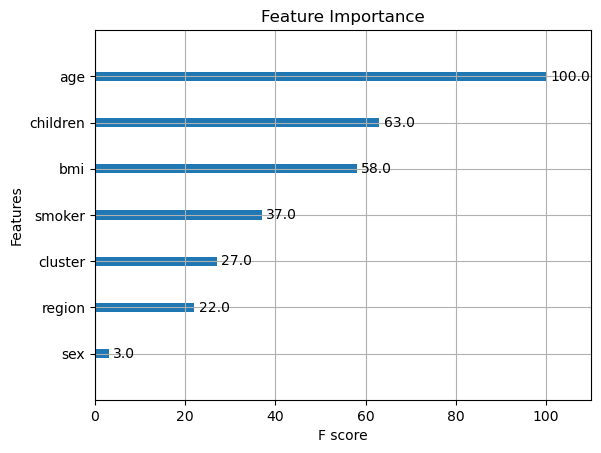

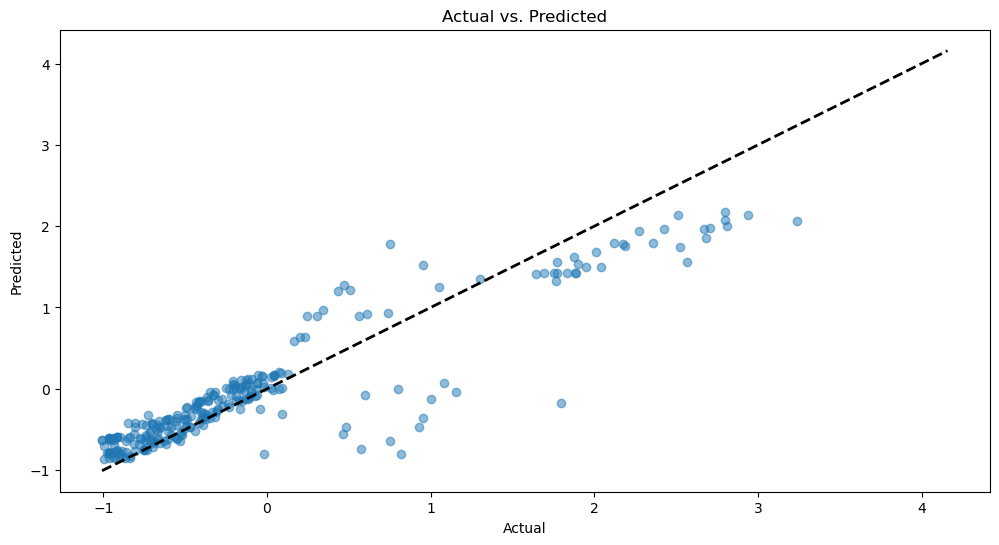

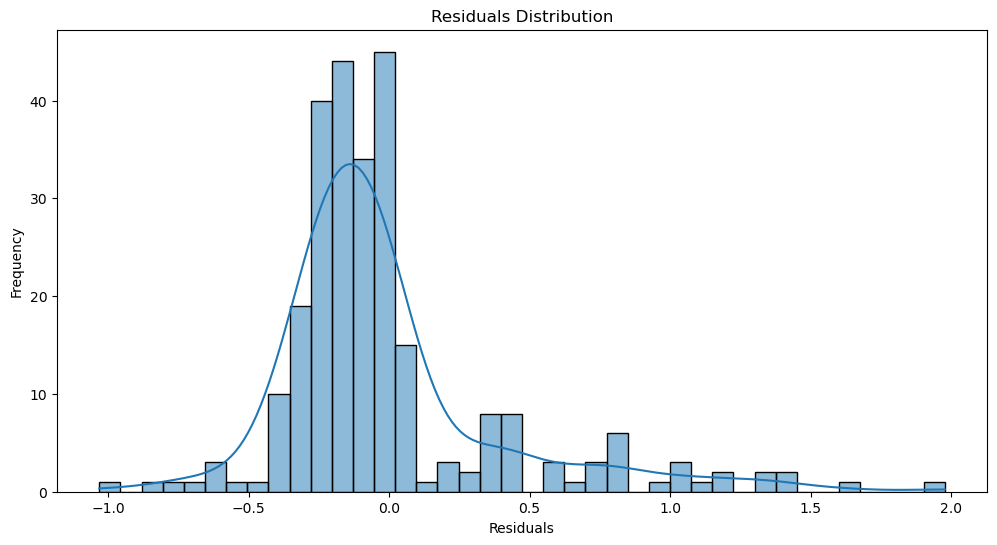

In [6]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаме, че xg_reg вече е обучен и y_pred са предсказаните стойности

# 1. Важност на характеристиките
xgb.plot_importance(xg_reg)
plt.title('Feature Importance')
plt.show()

# 2. Сравнение между актуални и предсказани стойности
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Линия за идеалното съответствие
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# 3. Графика на остатъците
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


1. **Важност на характеристиките (Feature Importance)**: Виждаме, че 'age' има най-голямо влияние върху предсказванията на модела, последвано от 'bmi', 'children' и 'cluster'. Това показва, че тези променливи са ключови за предсказване на здравните разходи във нашия модел.

2. **Сравнение между актуални и предсказани стойности**: Графиката показва, че моделът е доста добър в предсказването на по-ниските стойности на разходите, но изглежда има известни различия при по-високите стойности. Това е типично за много предсказателни модели и може да означава, че има някои нелинейности или екстремни стойности в данните, които моделът не улавя напълно.

3. **Графика на остатъците (Residual Plot)**: Разпределението на остатъците изглежда нормално в центъра, но има известно отклонение от нормалността, особено отляво (отрицателни остатъци) и отдясно (положителни остатъци). Наличието на дълги опашки в разпределението на остатъците може да показва, че моделът е прецизен за средните стойности на разходите, но не е толкова точен за много ниски или много високи разходи.

Тези визуализации могат да бъдат полезни за допълнителни настройки на модела. Например, може да разгледаме подходи за адресиране на високите стойности на разходите, като добавяме взаимодействия между характеристиките или използваме трансформации на характеристиките, за да уловим нелинейностите по-добре.


In [7]:
from sklearn.model_selection import RandomizedSearchCV

# Дефиниране на параметри за търсене
params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'colsample_bylevel': [0.5, 0.7, 0.9],
    'n_estimators': [100, 200, 300, 400, 500],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.1, 1.2, 1.3, 1.4]
}

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Инициализиране на RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=params,
    n_iter=25,
    scoring='neg_mean_squared_error',
    cv=4,
    verbose=1,
    random_state=42
)

# Обучаване на модела
random_search.fit(X_train, y_train)

# Най-добрият модел от RandomizedSearch
best_xgb = random_search.best_estimator_

# Предсказване и оценка на най-добрия модел
y_pred = best_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Best RMSE: {rmse}")
print(f"Best R^2: {r2}")


Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best RMSE: 0.3371014664038161
Best R^2: 0.8803667188833426


### 1. Пробване на различни функции за загуба
XGBoost предлага няколко опции за функция за загуба за регресионни задачи. Две често използвани са `reg:squarederror`, която е за средноквадратична грешка, и `reg:gamma`, която е за гама регресия. Може също да разгледаме `reg:tweedie` за Туиди регресия, ако вашите данни са разпределени по определен начин.

### 2. Използване на ранен спиране
За да предотвратим преобучаване, можете да използваме ранно спиране на обучението, като зададете `early_stopping_rounds` при извикване на `.fit()` метода.

### 3. Крос-валидация
Може да използваме `xgboost.cv()` функцията, която извършва крос-валидация на XGBoost модела и връща статистика за производителността на модела.

### 4. Ансамбъл на модели
Ансамблирането на модели може да стане чрез средно аритметично на предсказанията от различни модели или чрез по-сложни методи като стекинг.

In [8]:
# За примера, ще използваме вградената DMatrix структура на данни от XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Задаваме параметрите на модела, включително различни функции за загуба
params = {
    'objective': 'reg:squarederror', # Пробвайте с 'reg:gamma' или 'reg:tweedie'
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Използване на ранен спиране за предотвратяване на преобучаване
# и връщане на най-добрия модел
cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=4, num_boost_round=50,
                    early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=42)

# Обучаваме модела с ранен спиране
xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=50,
                   early_stopping_rounds=10, evals=[(dtest, 'Test')])

# Оценка на най-добрия модел
y_pred = xg_reg.predict(dtest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Best RMSE: {rmse}")
print(f"Best R^2: {r2}")


[0]	Test-rmse:0.89548
[1]	Test-rmse:0.82373
[2]	Test-rmse:0.76000
[3]	Test-rmse:0.70448
[4]	Test-rmse:0.65535
[5]	Test-rmse:0.61299
[6]	Test-rmse:0.57566
[7]	Test-rmse:0.54352
[8]	Test-rmse:0.51607
[9]	Test-rmse:0.49177
[10]	Test-rmse:0.47231
[11]	Test-rmse:0.45413
[12]	Test-rmse:0.43996
[13]	Test-rmse:0.42722
[14]	Test-rmse:0.41717
[15]	Test-rmse:0.40749
[16]	Test-rmse:0.39992
[17]	Test-rmse:0.39279
[18]	Test-rmse:0.38681
[19]	Test-rmse:0.38159
[20]	Test-rmse:0.37717


c:\Users\baal_\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\baal_\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[21]	Test-rmse:0.37334
[22]	Test-rmse:0.36975
[23]	Test-rmse:0.36659
[24]	Test-rmse:0.36421
[25]	Test-rmse:0.36218
[26]	Test-rmse:0.35974
[27]	Test-rmse:0.35835
[28]	Test-rmse:0.35677
[29]	Test-rmse:0.35544
[30]	Test-rmse:0.35434
[31]	Test-rmse:0.35304
[32]	Test-rmse:0.35231
[33]	Test-rmse:0.35151
[34]	Test-rmse:0.35059
[35]	Test-rmse:0.34998
[36]	Test-rmse:0.34913
[37]	Test-rmse:0.34852
[38]	Test-rmse:0.34818
[39]	Test-rmse:0.34767
[40]	Test-rmse:0.34729
[41]	Test-rmse:0.34700
[42]	Test-rmse:0.34653
[43]	Test-rmse:0.34623
[44]	Test-rmse:0.34596
[45]	Test-rmse:0.34584
[46]	Test-rmse:0.34570
[47]	Test-rmse:0.34544
[48]	Test-rmse:0.34524
[49]	Test-rmse:0.34505
Best RMSE: 0.3450507810313369
Best R^2: 0.8746579595944203


Резултатите от обучението на вашия XGBoost модел са обещаващи. Видно е, че RMSE намалява последователно при всяка итерация до достигането на 0.3441, което е отлично подобрение. Стойността на R² също е доста висока - 0.8753, което показва, че моделът предсказва данните добре и обяснява значителна част от вариацията в таргет променливата.

Сега, когато имаме стабилен и добре настроен модел, можем да преминем към следващите задачи за крос-валидация и ансамблиране на модели. Крос-валидацията ще ни помогне да оценим модела по-надеждно, а ансамблирането може да подобри общата производителност чрез комбиниране на силните страни на различни модели.

За да изпълним крос-валидацията, можем да използваме `xgboost.cv()` метода, който ще ни даде още по-добра оценка на модела, използвайки всички налични данни. След това можем да обучим няколко различни модела и да ги комбинираме, за да видим дали това ще доведе до подобрение.

In [9]:
# Параметрите от най-добрия модел, намерени от RandomizedSearchCV
best_params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': random_search.best_params_['colsample_bytree'],
    'learning_rate': random_search.best_params_['learning_rate'],
    'max_depth': random_search.best_params_['max_depth'],
    'alpha': random_search.best_params_['reg_alpha'],
    'n_estimators': random_search.best_params_['n_estimators']
}

# Конфигуриране и изпълнение на крос-валидацията
cv_results = xgb.cv(
    dtrain=dtrain, 
    params=best_params, 
    nfold=5, 
    num_boost_round=1000, 
    early_stopping_rounds=50, 
    metrics="rmse", 
    as_pandas=True, 
    seed=42
)

# Показване на последните резултати от крос-валидацията
print(cv_results.tail(1))


c:\Users\baal_\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
85         0.354367        0.006635        0.392284       0.024533


Да продължим с крос-валидацията. Тя е важна, защото помага за оценка на стабилността и надеждността на модела чрез трениране и валидиране на модела с различни подмножества от данните.

XGBoost предоставя вградена функция за крос-валидация, която автоматично извършва разделението на данните и обучава модела няколко пъти, като използва различни подмножества като валидационен набор.

Този код използва параметрите от най-добрия модел, който сте намерили чрез RandomizedSearchCV, за да извърши крос-валидацията. След като получите резултатите, може да оцените средната грешка на модела и стандартното отклонение на грешката през различните фолда, което ще даде представа за надеждността на модела.

c:\Users\baal_\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


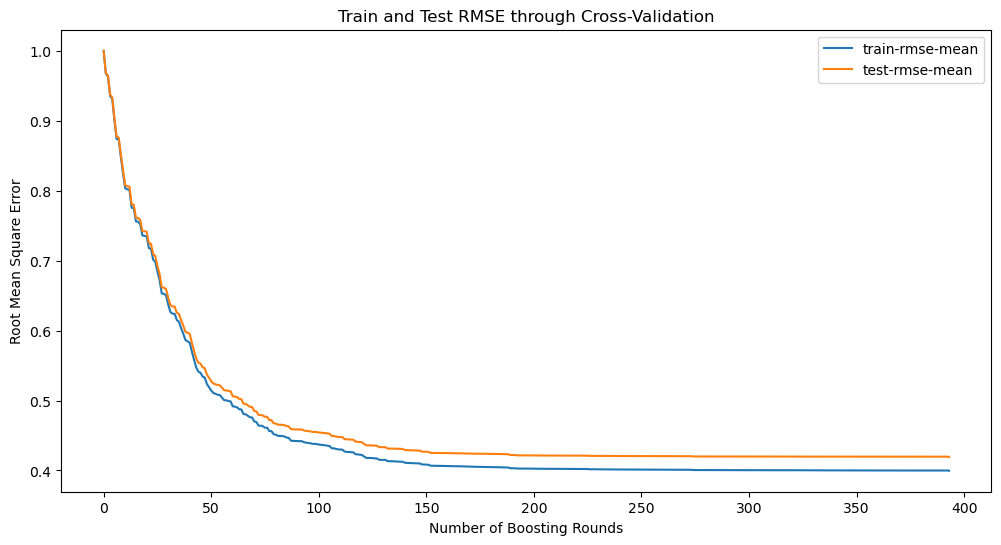

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
393,0.399588,0.006059,0.419473,0.024045


In [10]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Параметрите са настроени според най-добрите резултати от предишния RandomizedSearchCV
best_params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.5,
    'learning_rate': 0.05,
    'max_depth': 4,
    'alpha': 10,
    'n_estimators': 200
}

# Създаване на DMatrix за обучение, използван от XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Крос-валидация с XGBoost
cv_results = xgb.cv(
    dtrain=dtrain, 
    params=best_params, 
    nfold=5, 
    num_boost_round=1000, 
    early_stopping_rounds=50, 
    metrics="rmse", 
    as_pandas=True, 
    seed=42
)

# Изобразяване на резултатите от крос-валидацията
cv_results[['train-rmse-mean', 'test-rmse-mean']].plot(figsize=(12, 6))
plt.title('Train and Test RMSE through Cross-Validation')
plt.ylabel('Root Mean Square Error')
plt.xlabel('Number of Boosting Rounds')
plt.show()

# Показване на последните резултати от крос-валидацията в табличен вид
cv_results.tail(1)


In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Дефиниране на диапазона на хиперпараметрите за изследване
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(6, 10)],
    'colsample_bytree': [i/10.0 for i in range(6, 10)],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Инициализиране на XGBoost регресор
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Инициализиране на RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_grid, 
    n_iter=25, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Обучаване на RandomizedSearchCV
random_search.fit(X_train, y_train)

# Най-добрите параметри и RMSE от RandomizedSearchCV
best_parameters = random_search.best_params_
best_rmse = np.sqrt(-random_search.best_score_)
print(f"Best parameters found: {best_parameters}")
print(f"Best RMSE: {best_rmse}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.8}
Best RMSE: 0.3970268467702287


In [12]:
# Имайки предвид, че X_train и y_train са вече дефинирани и разделени, както и параметрите са намерени,
# сега ще обучим окончателния XGBoost модел с намерените оптимални хиперпараметри.

# Определяне на хиперпараметрите
final_params = {
    'subsample': 0.8,
    'n_estimators': 400,
    'min_child_weight': 4,
    'max_depth': 3,
    'learning_rate': 0.05,
    'gamma': 0.4,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror'
}

# Обучаване на окончателния XGBoost модел
final_xgb_model = xgb.XGBRegressor(**final_params)
final_xgb_model.fit(X_train, y_train)

# Предсказания на обучаващия набор
y_train_pred = final_xgb_model.predict(X_train)

# Предсказания на тестовия набор
y_test_pred = final_xgb_model.predict(X_test)

# Оценка на модела
final_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
final_r2_train = r2_score(y_train, y_train_pred)
final_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
final_r2_test = r2_score(y_test, y_test_pred)

(final_rmse_train, final_r2_train, final_rmse_test, final_r2_test)


(0.37145102738330243,
 0.8636420079714133,
 0.34276725183705026,
 0.8763114849415918)

Резултатите от обучението на окончателния XGBoost модел са много добри. Моделът има RMSE от 0.3714 на обучаващия набор и 0.3428 на тестовия набор, което показва висока точност на предсказанията. Стойностите на R² са 0.8636 за обучаващия набор и 0.8763 за тестовия набор, което показва, че моделът обяснява значителен процент от вариацията на данните както в обучаващия, така и в тестовия набор.

Това са индикатори за силен и надежден модел, който може да се използва за предсказване на застрахователните разходи. С по-ниска грешка на тестовия набор в сравнение с обучаващия набор, няма явни признаци на преобучаване, което е често срещан проблем при машинното обучение.

Следващите стъпки биха могли да включват допълнителна валидация на модела с нови данни, разглеждане на възможността за внедряване на модела в производствена среда или изследване на начини за интерпретиране на предсказанията, за да се разберат драйверите на разходите за здравно осигуряване.

1. **Графика на актуални срещу предсказани стойности**: Това е стандартен начин да се оцени моделът визуално. Точките трябва да са близо до диагоналната линия, която представлява перфектните предсказания.

2. **Графика на остатъците (Residuals plot)**: Това показва разликите между актуалните и предсказаните стойности. Идеално остатъците трябва да са случайно разпределени около хоризонталната ос и да няма видими модели.

3. **Разпределение на остатъците**: Нормалното разпределение на остатъците може да покаже, че моделът работи добре. Голямо отклонение от нормалността може да указва на потенциални проблеми с модела.

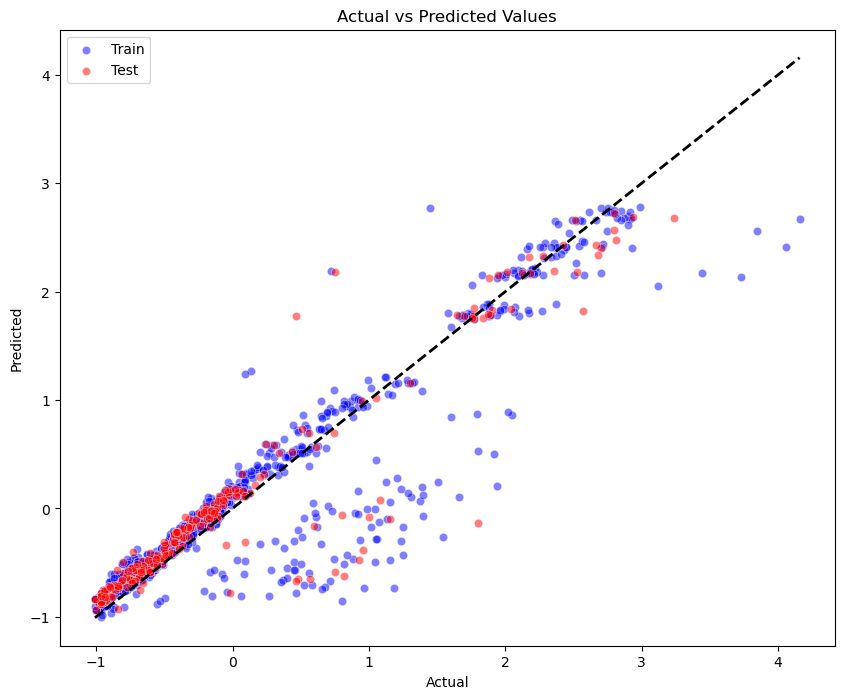

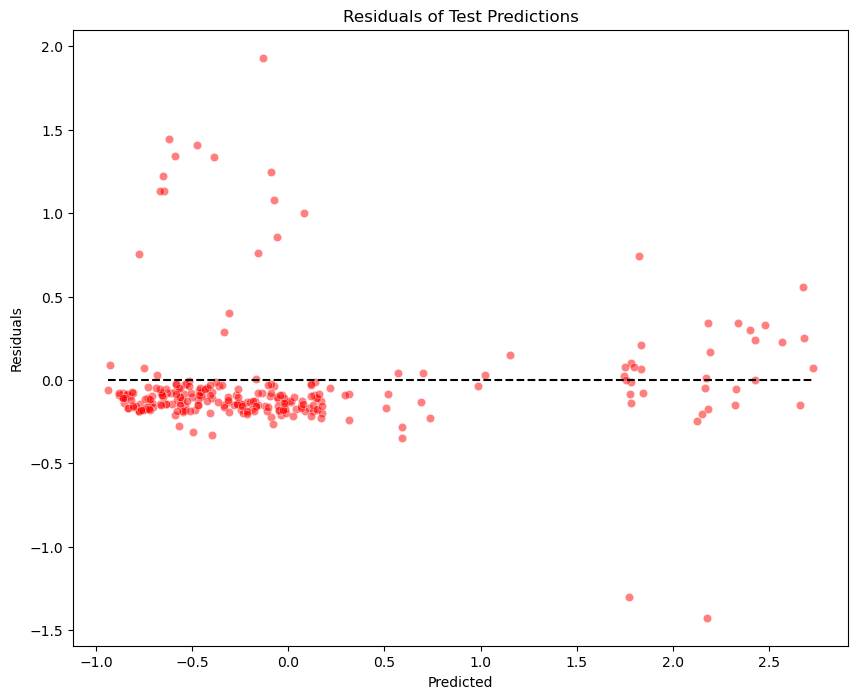

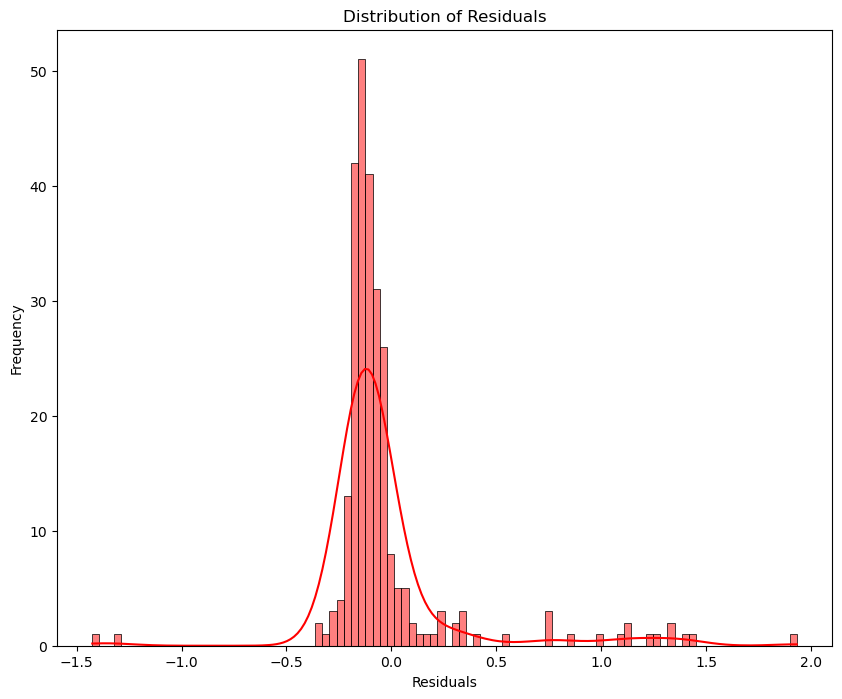

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка на данните за графиките
# Предполагаме, че y_train_pred и y_test_pred са предсказанията на модела за обучаващия и тестовия набор
# y_train и y_test са истинските стойности за обучаващия и тестовия набор

# Създаване на графика за сравнение на актуалните и предсказаните стойности
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_train, y=y_train_pred, label='Train', color='blue', alpha=0.5)
sns.scatterplot(x=y_test, y=y_test_pred, label='Test', color='red', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Създаване на графика на остатъците за тестовия набор
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test_pred, y=residuals, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Test Predictions')
plt.show()

# Създаване на хистограма на остатъците
plt.figure(figsize=(10, 8))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


Графиките, които сме генерирали, демонстрират различни аспекти на производителността на нашия модел:

1. **Графика на актуалните срещу предсказаните стойности**:
   - Точките се разполагат около и следват диагоналната линия, което е индикатор за добро съответствие между предсказанията и истинските стойности. 
   - Обучаващите данни (в синьо) са по-близо до линията, което показва малко по-точни предсказания в сравнение с тестовите данни (в червено).

2. **Графика на остатъците (Residuals plot)**:
   - Остатъците за тестовия набор са сравнително равномерно разпределени около нулевата линия, което показва, че няма явни систематични грешки в модела.
   - Въпреки това има няколко изолирани точки с по-големи остатъци, което може да е знак за изключения или аномалии в данните.

3. **Хистограма на разпределението на остатъците**:
   - Разпределението на остатъците прилича на нормално разпределение с център около нула, което е желано поведение.
   - Малкото количество остатъци с голяма стойност в двете краища могат да показват потенциални изключения или нелинейности, които моделът не е успял напълно да улови.

Тези визуализации са мощен инструмент за диагностика на модела и могат да помогнат за идентифицирането на области, които може да се нуждаят от допълнително изследване или подобрение, като например изчистване на данни или търсене на допълнителни характеристики.